In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import collections
from scipy.sparse import coo_matrix 

In [ ]:
colnames=['source', 'target', 'rating', 'time'] 
df = pd.read_csv("/content/drive/MyDrive/soc-sign-bitcoinotc.csv", sep = ',', header = None)
df.columns =['source', 'target', 'rating', 'time'] 

In [ ]:
df.columns

Index(['source', 'target', 'rating', 'time'], dtype='object')

In [ ]:
import networkx as nx
G = nx.DiGraph()
for i in range(0,df.shape[0]):
  G.add_edge(df['source'][i],df['target'][i])

In [ ]:
# Page Rank using the inbuilt networkx library

pagerank = nx.pagerank(G)

In [ ]:
pagerank

{6: 0.0007741085917228506,
 2: 0.0009774710321327727,
 5: 9.298616272940449e-05,
 1: 0.005029048679852529,
 15: 0.00032293239289585003,
 4: 0.0012898358110030761,
 3: 0.00038277895200766233,
 13: 0.004285772484391748,
 16: 5.235060037934621e-05,
 10: 0.00013403416569389068,
 7: 0.005912435786337965,
 21: 0.0006441925866757662,
 20: 0.00023465574128920115,
 8: 9.40420469756542e-05,
 17: 0.00042442425832789685,
 23: 0.0006896469811648333,
 25: 0.002060798656742606,
 26: 0.00037046843223554905,
 28: 0.00033990550841227836,
 29: 0.0009314643278654528,
 31: 7.229960098291021e-05,
 32: 0.00016496088457537,
 34: 9.384064646831807e-05,
 35: 0.015107372805455366,
 36: 0.000981221707925812,
 37: 0.0003435503830252744,
 44: 0.00010756711558909126,
 39: 0.0006532796404355695,
 45: 0.00029124956823957946,
 19: 0.000266867730032477,
 46: 5.879979399223194e-05,
 47: 7.652365224703115e-05,
 51: 0.0006733880437096258,
 52: 5.8958731280655836e-05,
 53: 7.909477715256184e-05,
 54: 0.0002680042966339648,


In [ ]:
pagerank

0.005029048679852529

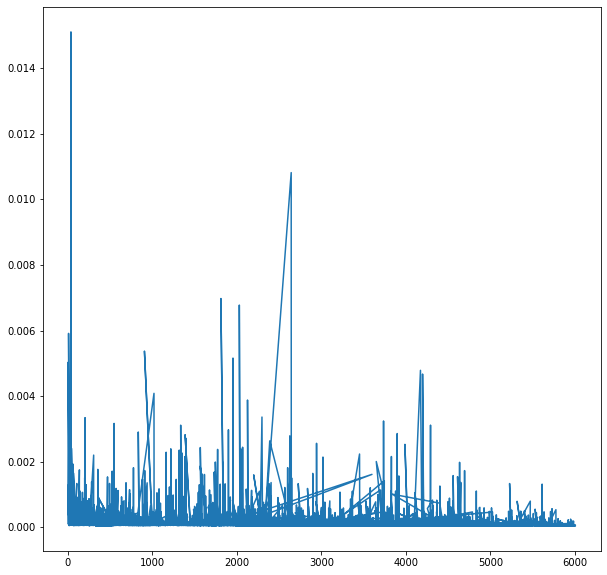

In [ ]:
import matplotlib.pylab as plt
myList = pagerank.items()
x, y = zip(*myList) 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(x, y)
plt.show()

In [ ]:
# Hub and Authority using the inbuilt Networkx library

hubs, auth = nx.hits(G)

In [ ]:
hubs

{6: 0.0014629173309573145,
 2: 0.0007758275426393981,
 5: 0.00020879948188316468,
 1: 0.004636831266948586,
 15: 0.00030249489456763605,
 4: 0.0015073564036747497,
 3: -0.0,
 13: 0.004512775520459806,
 16: -0.0,
 10: 0.0003013670388846936,
 7: 0.0030944942686683624,
 21: 0.00030489615724863884,
 20: -0.0,
 8: 0.0001081357333705631,
 17: 0.000634424330286429,
 23: 0.0002482000979982365,
 25: -0.0,
 26: 0.00022634414151531982,
 28: 0.0002010762303818956,
 29: 0.0006104895970105328,
 31: 0.00013506517045776208,
 32: 0.00036205393276500487,
 34: 0.00026271204713484937,
 35: 0.006125015357323969,
 36: 0.0005122552785621995,
 37: 0.00020136650206168874,
 44: 1.230084062430149e-05,
 39: 0.0003945251916617521,
 45: 9.763109689428891e-05,
 19: 0.0003731218095771282,
 46: 7.96315674929271e-06,
 47: 0.00017099488985140653,
 51: 0.0007908651673974092,
 52: 1.4931648089788853e-05,
 53: 6.467323640917366e-05,
 54: 0.00030911348339798345,
 41: 0.0025262511467515243,
 55: 6.285915648084345e-05,
 57: 0

In [ ]:
auth

{6: 0.0015718821282270107,
 2: 0.0005890168397930876,
 5: 0.00016970301811764727,
 1: 0.004496189948700376,
 15: 0.0002946753929369685,
 4: 0.0011197026235601761,
 3: 0.0005475613411447125,
 13: 0.0038135198037455163,
 16: 8.329469180041478e-05,
 10: 0.0002481369752860905,
 7: 0.002613629174589661,
 21: 0.00037178107470071,
 20: 0.00022251672344926268,
 8: 9.677457595727516e-05,
 17: 0.0005249403640364289,
 23: 0.0004601965780337116,
 25: 0.0027054670885150968,
 26: 0.00017360418438595992,
 28: 0.0002125722978049296,
 29: 0.0006208449692459901,
 31: 0.00011340653131719127,
 32: 0.00029052471290717525,
 34: 0.0002259958686655729,
 35: 0.00489451351108604,
 36: 0.00033110114686513094,
 37: 0.00016442127863185122,
 44: 4.2305833815264835e-05,
 39: 0.0003470369993272214,
 45: 7.542786908326173e-05,
 19: 0.00025970519707347965,
 46: 9.454967426925464e-06,
 47: 0.0001427011768651581,
 51: 0.0007013626199908282,
 52: 1.1268130355655401e-05,
 53: 5.891875128894878e-05,
 54: 0.00024540503061701

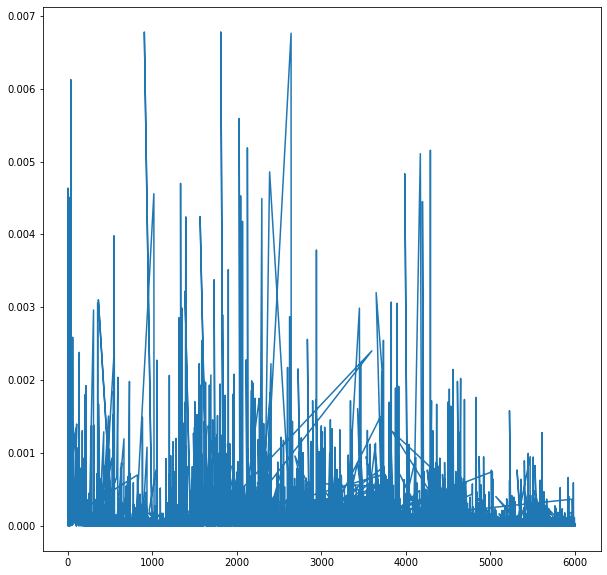

In [ ]:
import matplotlib.pylab as plt
myList = hubs.items()
x, y = zip(*myList) 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(x, y)
plt.show()

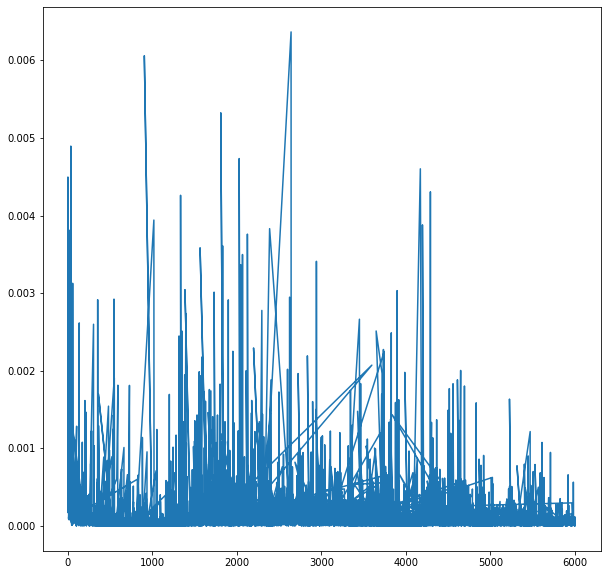

In [ ]:
import matplotlib.pylab as plt
myList = auth.items()
x, y = zip(*myList) 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(x, y)
plt.show()

**Page Rank, Hub and Authority from scratch using a single Iteration**

In [ ]:
# Find the Indegree nodes of a node and store it in a dictionary
inedgeDict = {}
for node in G.nodes():
  x = G.in_edges(node)
  nodelist = []
  for i in x:
    nodelist.append(i[0])
  inedgeDict[node] = nodelist


In [ ]:
# Length of indegree of each node
lenDict = {}
for key in inedgeDict:
  x = len(inedgeDict[key])
  lenDict[key] = x

In [ ]:
# Find the Outdegree nodes of a node and store it in a dictionary
outedgeDict = {}
for node in G.nodes():
  x = G.out_edges(node)
  nodelist = []
  for i in x:
    nodelist.append(i[1])
  outedgeDict[node] = nodelist

In [ ]:
# Length of Outdegree of each node
lenDict2 = {}
for key in outedgeDict:
  x = len(outedgeDict[key])
  lenDict2[key] = x

In [ ]:
# Page Rank of a node only for one iteration
# Algorihtm
# Step 1: Find the indegree node of a node
# Step 2: Calculate initial P(Node) as 1 / length of Indegree Node
# Step 3: Now iterate through the Indegree Nodes of and node and find their respective 
# prob by dividing the value which we get from the step 2 from the length of the outgoing degree nodes
# Step 4: Sum all the values
# Step 5: Store the page rank value of a node in a dictionary
pagerankValue = {}
for node in G.nodes():
  if lenDict[node] != 0:
    len1 = 1.0/(lenDict[node] + 1)
    pageRank
    for values in inedgeDict[node]:
      x = 0
      if lenDict2[values] != 0:
        x += len1/(lenDict2[values] + 1)
      pageRank = x
  pagerankValue[node] = pageRank

In [ ]:
pagerankValue

{6: 0.000516795865633075,
 2: 0.0002645502645502645,
 5: 0.0011574074074074073,
 1: 0.0004894762604013706,
 15: 0.00041288191577208916,
 4: 0.004545454545454545,
 3: 0.0012987012987012987,
 13: 0.0006510416666666666,
 16: 0.002369668246445498,
 10: 0.004065040650406504,
 7: 8.378718056137411e-05,
 21: 0.0026455026455026454,
 20: 0.0013774104683195593,
 8: 0.0011574074074074073,
 17: 0.0015151515151515152,
 23: 0.0006988120195667365,
 25: 0.0002506265664160401,
 26: 0.007575757575757575,
 28: 0.041666666666666664,
 29: 0.0005241090146750523,
 31: 0.0015432098765432098,
 32: 0.0015698587127158554,
 34: 0.001184834123222749,
 35: 0.0009328358208955224,
 36: 0.00267379679144385,
 37: 0.001098901098901099,
 44: 0.0037313432835820895,
 39: 0.0011655011655011655,
 45: 0.011904761904761904,
 19: 0.00909090909090909,
 46: 0.013888888888888888,
 47: 0.0015432098765432098,
 51: 0.0030303030303030303,
 52: 0.014705882352941176,
 53: 0.001430615164520744,
 54: 0.000536480686695279,
 41: 0.000189393

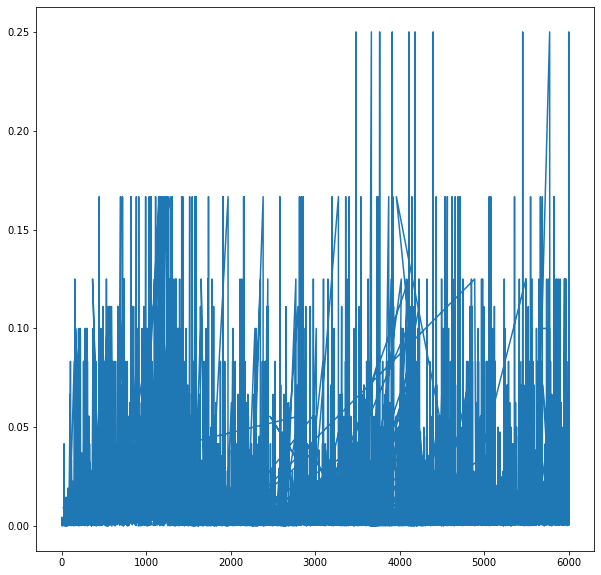

In [33]:
import matplotlib.pylab as plt
myList = pagerankValue.items()
x, y = zip(*myList) 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(x, y)
plt.show()

In [30]:
# Hubs and authority for a single iteration
# Hubs :- Outdegree
# Authority :- Indegree
# Algorithm
# Step 1:- Calculate the sum of the Outdegree of Indegrees and strore it in a intNodeAuth dictionary
# Step 2:- Calculate the sum of the Indegree of Outdegrees and strore it in a intNodeHub dictionary
# Step 3:- Calculate thes auth sum of all the nodes and store it in authSum
# Step 4:- Calculate thes hub sum of all the nodes and store it in hubSum
# Step 5:- Normalize the auth and the hub of each nodes by dividing the auth value of a node with the authSum and hub by hub value of a node with hubSum
# Step 6:- Store it in a dictionary

intNodeAuth = {}
intNodeHub = {}

for node in G.nodes():
  sum = 0
  for value in inedgeDict[node]:
    sum += lenDict2[value]
  intNodeAuth[node] = sum

for node in G.nodes():
  sum = 0
  for value in outedgeDict[node]:
    sum += lenDict[value]
  intNodeHub[node] = sum

In [31]:
authSum = 0
hubSum = 0

for key in intNodeAuth:
  authSum += intNodeAuth[key]
for key in intNodeHub:
  hubSum += intNodeHub[key]

In [ ]:
# Normailize the auth and the sum 

In [32]:
finalAuthDict = {}
finalHubDict = {}

for node in G.nodes():
  nodeAuth = intNodeAuth[node]/authSum
  finalAuthDict[node] = nodeAuth

for node in G.nodes():
  nodeHub = intNodeHub[node]/hubSum
  finalHubDict[node] = nodeHub


In [ ]:
finalAuthDict

{6: 0.001576832330044468,
 2: 0.0006052237914779686,
 5: 0.000172063039375231,
 1: 0.003480831753438964,
 15: 0.00022364661996821604,
 4: 0.0009383971921573172,
 3: 0.00047873802536640243,
 13: 0.0028367436204183357,
 16: 7.419556112689632e-05,
 10: 0.00020739425895946733,
 7: 0.002124466233600131,
 21: 0.000411255395960511,
 20: 0.0002745235761695164,
 8: 8.656148798137903e-05,
 17: 0.00046177903996596895,
 23: 0.000426801132577575,
 25: 0.0019071792331570776,
 26: 0.0003275204055458709,
 28: 0.0004003027178893977,
 29: 0.0006045171670862838,
 31: 9.822079044417702e-05,
 32: 0.0002239999321640584,
 34: 0.00023212611266843275,
 35: 0.002893273571753114,
 36: 0.00036815130806774264,
 37: 0.00014909774664547735,
 44: 3.674446836760579e-05,
 39: 0.0003699178690469545,
 45: 6.253625866409832e-05,
 19: 0.0002610977127275066,
 46: 1.236592685448272e-05,
 47: 0.00015793055154153643,
 51: 0.00048439102049988025,
 52: 1.1659302462797992e-05,
 53: 8.585486358969431e-05,
 54: 0.000257564590769082

In [ ]:
finalHubDict

{6: 0.0016566245981467244,
 2: 0.0008970134956435646,
 5: 0.00023679986902920823,
 1: 0.0040787072091430085,
 15: 0.0002567768127127423,
 4: 0.0015469950291517205,
 3: 0.0,
 13: 0.0036825790331743947,
 16: 0.0,
 10: 0.00027724099892514296,
 7: 0.0027894634777617636,
 21: 0.0003902812656222136,
 20: 0.0,
 8: 0.0001101168115238705,
 17: 0.0006256194070648217,
 23: 0.0003103734908880775,
 25: 0.0,
 26: 0.00038102365757374657,
 28: 0.00039466644838201376,
 29: 0.0006865247231731572,
 31: 0.00013642790808267142,
 32: 0.0003361973449180117,
 34: 0.00030842452077261076,
 35: 0.003502299297493722,
 36: 0.0007591238599742931,
 37: 0.00021877189546114096,
 44: 1.8027973568067295e-05,
 39: 0.00046824007024088296,
 45: 9.891023335993678e-05,
 19: 0.00041805408976761457,
 46: 1.607900345260056e-05,
 47: 0.00021536119775907416,
 51: 0.0006071041909678878,
 52: 1.7053488510333928e-05,
 53: 0.00011060405405273718,
 54: 0.0003620211989479459,
 41: 0.0023187871948765473,
 55: 0.00010524438623520366,
 57

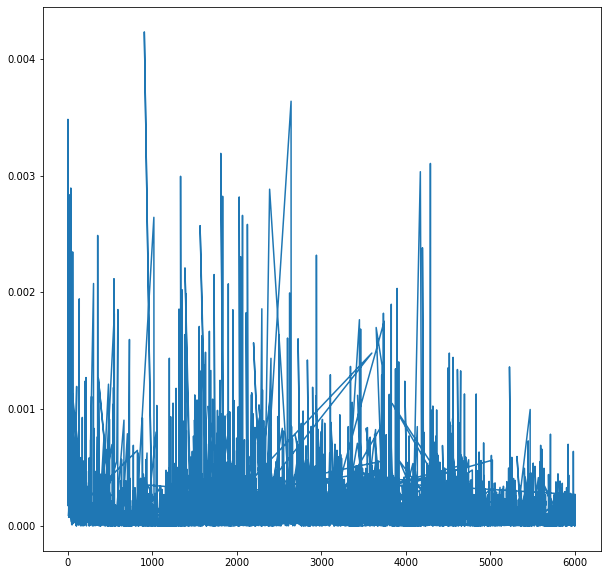

In [34]:
import matplotlib.pylab as plt
myList = finalAuthDict.items()
x, y = zip(*myList) 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(x, y)
plt.show()

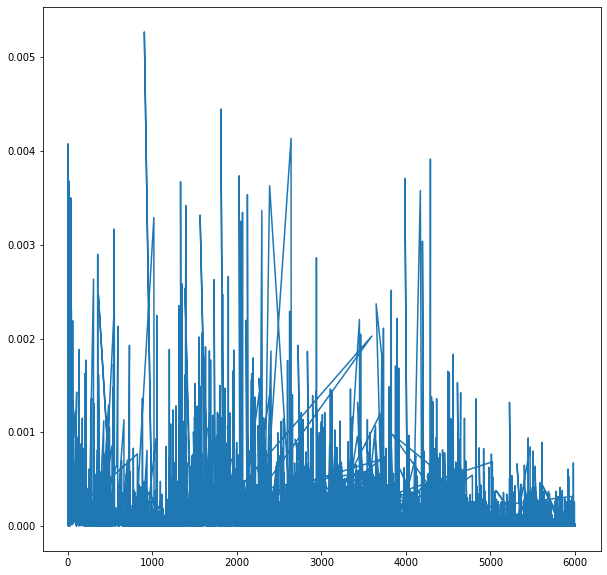

In [35]:
import matplotlib.pylab as plt
myList = finalHubDict.items()
x, y = zip(*myList) 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(x, y)
plt.show()